In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
identifiers = ['player_name', 'club_involved_name', 'season']
player_var = ['age', 'wage', 'value', 'cost', 'ratingFM', 'potential', 'injprone', 'afterloan', 'contract']
team_var = ['reputation', 'balance', 'wagebudget', 'trainingfacilities', 'youthfacilities', 'youthacademy', 'stadiumcap', 'avgattendance']
stats_var = ['gamesPlayed', 'subedOn', 'MotM', 'ratingWS']
offensive_var = ['goalsScored', 'assists', 'shots', 'passes', 'passesSuccess', 'aerialsWon', 'keyPasses', 'dribbles', 'offsides', 'dispossessed', 'badTouch', 'crosses', 'longBalls', 'throughBalls']
defensive_var = ['yellow', 'red', 'tackles', 'interceptions', 'fouls', 'offsidesProvoked', 'clearances', 'blockedPass', 'ownGoal']
previous_var = ['ATaction', 'ATgoals', 'ATassists', 'ATshots', 'ATpasses', 'ATpassesSuccess', 'ATtackles', 'ATinterceptions', 'ATMotM', 'ATrating', 'CLaction', 'CLgoals', 'CLassists', 'CLMotM', 'CLrating', 'ELaction', 'ELgoals', 'ELassists', 'ELMotM', 'ELrating']
pos_var = ['GK', 'DEF', 'MID', 'STR', 'Wing', 'Central']
external_var = ['year', 'GDP', 'CountryPopulation', 'UEFAranking', 'eurgbp']
features = player_var + team_var + stats_var + offensive_var + defensive_var + previous_var + pos_var + external_var
labels = ['fee_cleaned', 'fee_log']

removed_features = []

In [21]:
len(features)

75

In [3]:
df = pd.read_csv('data/data.csv')

In [4]:
df

Unnamed: 0         player_name     club_involved_name     season  \
0              0              Neymar    Paris Saint-Germain  2017/2018   
1              1       Kylian Mbappé    Paris Saint-Germain  2018/2019   
2              2     Ousmane Dembélé           FC Barcelona  2017/2018   
3              3          João Félix        Atlético Madrid  2019/2020   
4              4   Antoine Griezmann           FC Barcelona  2019/2020   
...          ...                 ...                    ...        ...   
2944        3001     Daniele Capelli              AC Cesena  2015/2016   
2945        3002  Henrikh Mkhitaryan                AS Roma  2020/2021   
2946        3003      Gastón Ramírez       Middlesbrough FC  2016/2017   
2947        3004     Antonio Cassano               Parma FC  2014/2015   
2948        3005     Jean Beausejour  SC Cambuur-Leeuwarden  2014/2015   

           age       wage     value       cost  ratingFM  potential  ...  \
0    -0.585046  12.315201  7.299882  11.404813  3.330984   0.957797  ...   
1    -2.049648   7.434713  6.148324   8.490667  1.275699  -3.630068  ...   
2    -1.805548   0.701205  2.565702   6.706495  0.680749  -7.472122  ...   
3    -2.049648  -0.499342  0.518489   2.602902  1.492045   0.993957  ...   
4     0.147256  20.040466  8.835291   6.647023  4.178338   1.147640  ...   
...        ...        ...       ...        ...       ...        ...  ...   
2944  0.391356  -0.368848 -0.505117  -0.430189 -0.451461   0.014912  ...   
2945  0.879557   4.094058  3.205456  -0.073354  2.249255   0.781514  ...   
2946 -0.585046   0.440217  0.390539   0.342952  0.356230   0.257187  ...   
2947  0.879557   0.205327 -0.249215  -0.073354  0.911517   0.283403  ...   
2948  0.635457  -0.212255 -0.249215  -0.430189 -0.595691  -0.063737  ...   

           STR      Wing   Central      year       GDP  CountryPopulation  \
0     1.509692  1.526437 -0.974713  0.053782 -1.434860           3.183356   
1     1.509692 -0.655120  1.025943  0.565559  0.437768           0.177493   
2     1.509692  1.526437 -0.974713  0.053782  0.437768           0.177493   
3     1.509692 -0.655120  1.025943  1.077336 -0.675067          -1.008040   
4     1.509692 -0.655120  1.025943  1.077336  0.437768           0.177493   
...        ...       ...       ...       ...       ...                ...   
2944 -0.662387 -0.655120  1.025943 -0.969772 -0.053215           0.036322   
2945 -0.662387 -0.655120 -0.974713  1.589113 -1.795314          -1.160675   
2946 -0.662387 -0.655120 -0.974713 -0.457995 -1.238797          -1.150154   
2947  1.509692 -0.655120  1.025943 -1.481549 -0.053215           0.036322   
2948 -0.662387  1.526437 -0.974713 -1.481549  0.402287           0.172786   

      UEFAranking    eurgbp  fee_cleaned   fee_log  
0       -1.703498  0.565087        199.8  5.302309  
1        0.183647  0.668371        130.5  4.879007  
2       -0.288139  0.565087        124.2  4.829912  
3        0.655433  0.856442        113.4  4.739701  
4       -1.703498  0.856442        108.0  4.691348  
...           ...       ...          ...       ...  
2944    -0.759925 -1.964614          0.0  0.000000  
2945    -1.231711  0.939686          0.0  0.000000  
2946    -1.231711 -0.020706          0.0  0.000000  
2947    -0.759925 -0.751406          0.0  0.000000  
2948     0.419540 -0.751406          0.0  0.000000  

[2949 rows x 81 columns]

In [5]:
df.fee_cleaned.max(), df.fee_cleaned.mean(), df.fee_cleaned.median()

(199.8, 5.012676500508647, 0.45)

In [6]:
plt.rcParams['figure.dpi'] = 1080
plt.rcParams['figure.figsize'] = (2,12)

In [7]:
corr_matrix1 = df[features + labels].corr()

In [8]:
corr_matrix1[['fee_cleaned', 'fee_log']].loc['age']

fee_cleaned   -0.286826
fee_log       -0.462038
Name: age, dtype: float64

In [9]:
big_list = []
for i in range(9):
    t_df = df[(df.fee_log > (i * 0.5)) & (df.fee_log <= (i * 0.5 + 0.5))]
    small_list = []
    for feature in features:
        small_list.append(t_df[feature].mean())
    big_list.append(small_list)

In [10]:
progression_df = pd.DataFrame(big_list, columns = features)
progression_df

age      wage     value      cost  ratingFM  potential  injprone  \
0 -0.268079 -0.373090 -0.410475 -0.363184 -0.541793  -0.091661 -0.171475   
1 -0.216696 -0.198983 -0.256817 -0.267769 -0.270336  -0.128321 -0.148098   
2 -0.385640 -0.180253 -0.168294 -0.178379 -0.073859  -0.130435 -0.072095   
3 -0.360262  0.034347  0.158022  0.094131  0.225612   0.065927 -0.138924   
4 -0.615558  0.112038  0.293126  0.205073  0.314820   0.029360 -0.044841   
5 -0.700869  0.269561  0.703000  0.679697  0.593695  -0.073562 -0.048168   
6 -0.700890  0.740380  1.399371  1.383218  1.017719  -0.037670  0.117945   
7 -0.754675  0.804743  2.086429  2.315620  1.231208   0.265369 -0.028142   
8 -0.784764  1.850742  3.251984  3.078681  1.549327   0.609382 -0.099613   

   afterloan  contract  reputation  ...       DEF       MID       STR  \
0   0.024582  0.082236   -0.294022  ...  0.153144  0.064943 -0.111262   
1   0.218268  0.146042   -0.116447  ...  0.086058  0.125026 -0.085122   
2   0.429983  0.237259   -0.003855  ...  0.032595 -0.183210  0.056541   
3   0.340769  0.466142    0.136860  ...  0.051553 -0.063043 -0.021701   
4   0.330057  0.733168    0.318256  ... -0.130506 -0.047745  0.220021   
5   0.159048  0.936962    0.721129  ... -0.121452  0.005209  0.179848   
6  -0.036633  1.229310    1.021467  ... -0.020783  0.032607  0.018689   
7   0.046503  1.292946    1.199447  ... -0.227032 -0.171082  0.478875   
8  -0.341465  1.774390    1.479373  ... -0.477032 -0.155932  0.719846   

       Wing   Central      year       GDP  CountryPopulation  UEFAranking  \
0  0.012371 -0.078897 -0.232661  0.122567          -0.099068     0.317437   
1  0.081892 -0.199684 -0.238992  0.047495          -0.018240     0.145394   
2 -0.009871  0.060838 -0.065152 -0.003020          -0.124233    -0.080487   
3 -0.011639  0.032812 -0.082447  0.066076           0.065504    -0.243167   
4 -0.022079  0.070273 -0.046746  0.057597           0.029849    -0.319732   
5  0.057225 -0.015214  0.113837 -0.044595          -0.066376    -0.428953   
6 -0.100487  0.178208  0.274973 -0.097560          -0.031977    -0.522033   
7  0.047415  0.110389  0.209917 -0.267881           0.322046    -0.556018   
8  0.039012  0.025615  0.239882 -0.335086           0.027445    -0.802815   

     eurgbp  
0 -0.173413  
1 -0.131775  
2  0.014153  
3 -0.084187  
4 -0.087647  
5  0.153585  
6  0.292191  
7  0.230986  
8  0.055951  

[9 rows x 75 columns]

In [11]:
plt.style.use('grayscale')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 1080
plt.rcParams['figure.figsize'] = (10,16)

In [12]:
fixed_slots = len(features) - 28
slots = len(features) - 28
height = 20
small_letter = 14
smaller_letter = 5
normal_letter = 9

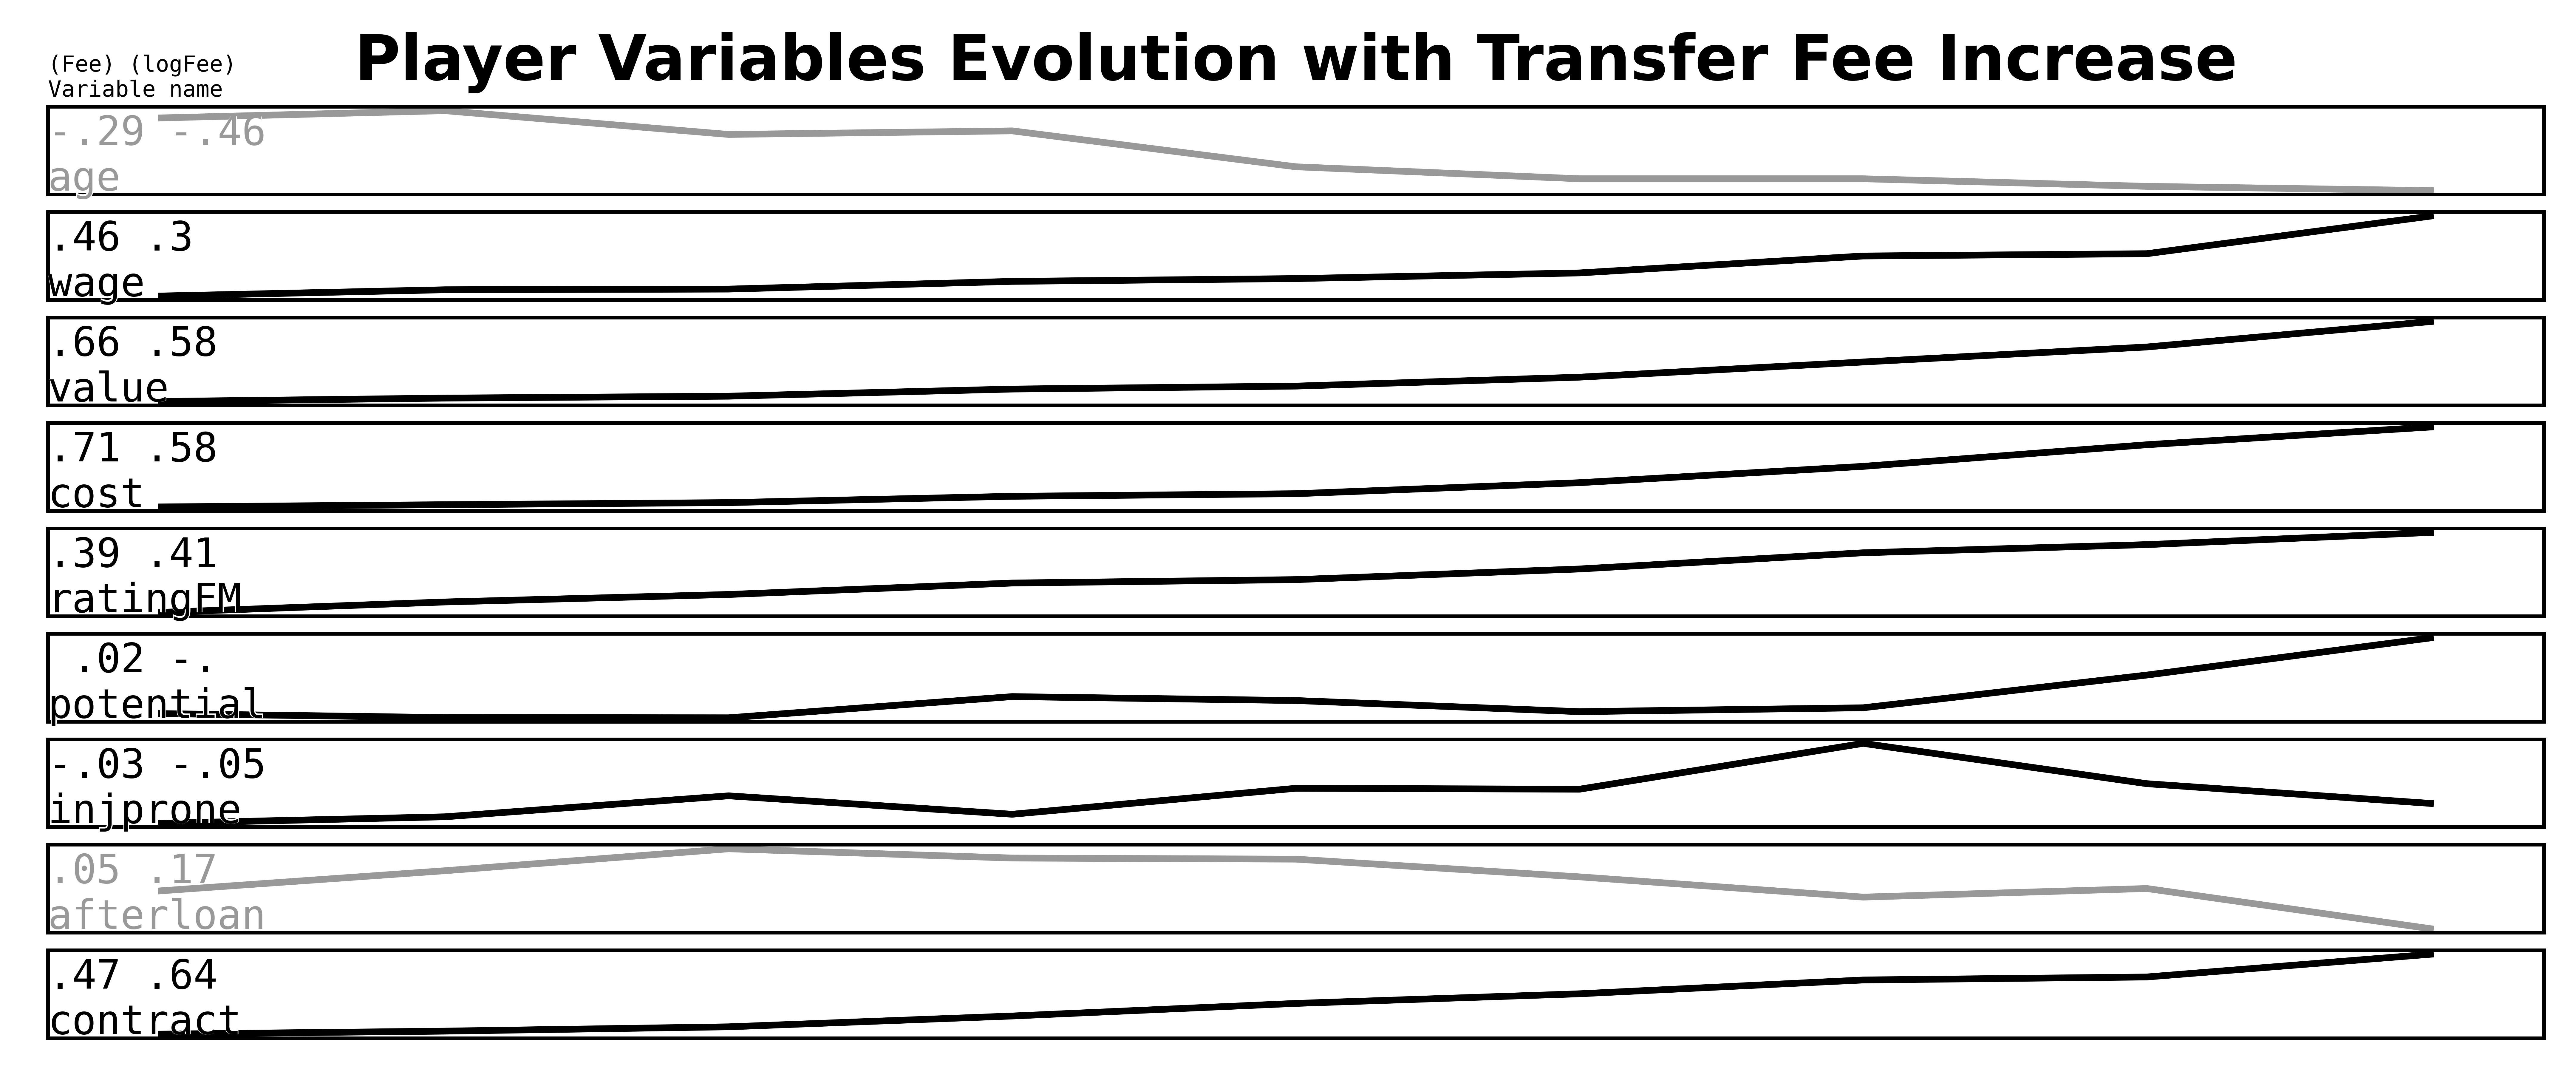

In [13]:
slots = len(player_var)
plt.rcParams['figure.figsize'] = (10,height * slots / fixed_slots)
for i, feature in enumerate(player_var):
    plt.subplot(slots, 1, i+1)
    if progression_df[feature].iloc[0] < progression_df[feature].iloc[-1]:
        plt.plot(progression_df[feature], color = 'C0')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'white', family='monospace', weight='bold')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'C0', family='monospace')
    else:
        plt.plot(progression_df[feature], color = 'C2')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'white', family='monospace', weight='bold')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'C2', family='monospace')
    plt.xticks([])
    plt.yticks([])
plt.subplot(slots, 1, 1)
plt.title('Player Variables Evolution with Transfer Fee Increase', fontsize=small_letter, fontweight='bold')
plt.text(-0.4, progression_df[player_var[0]].max() + 0.1, '(Fee) (logFee)\nVariable name', fontsize=smaller_letter, color = 'C0', family='monospace')
plt.savefig('img/006-1PlayerEvo.eps', format='eps')

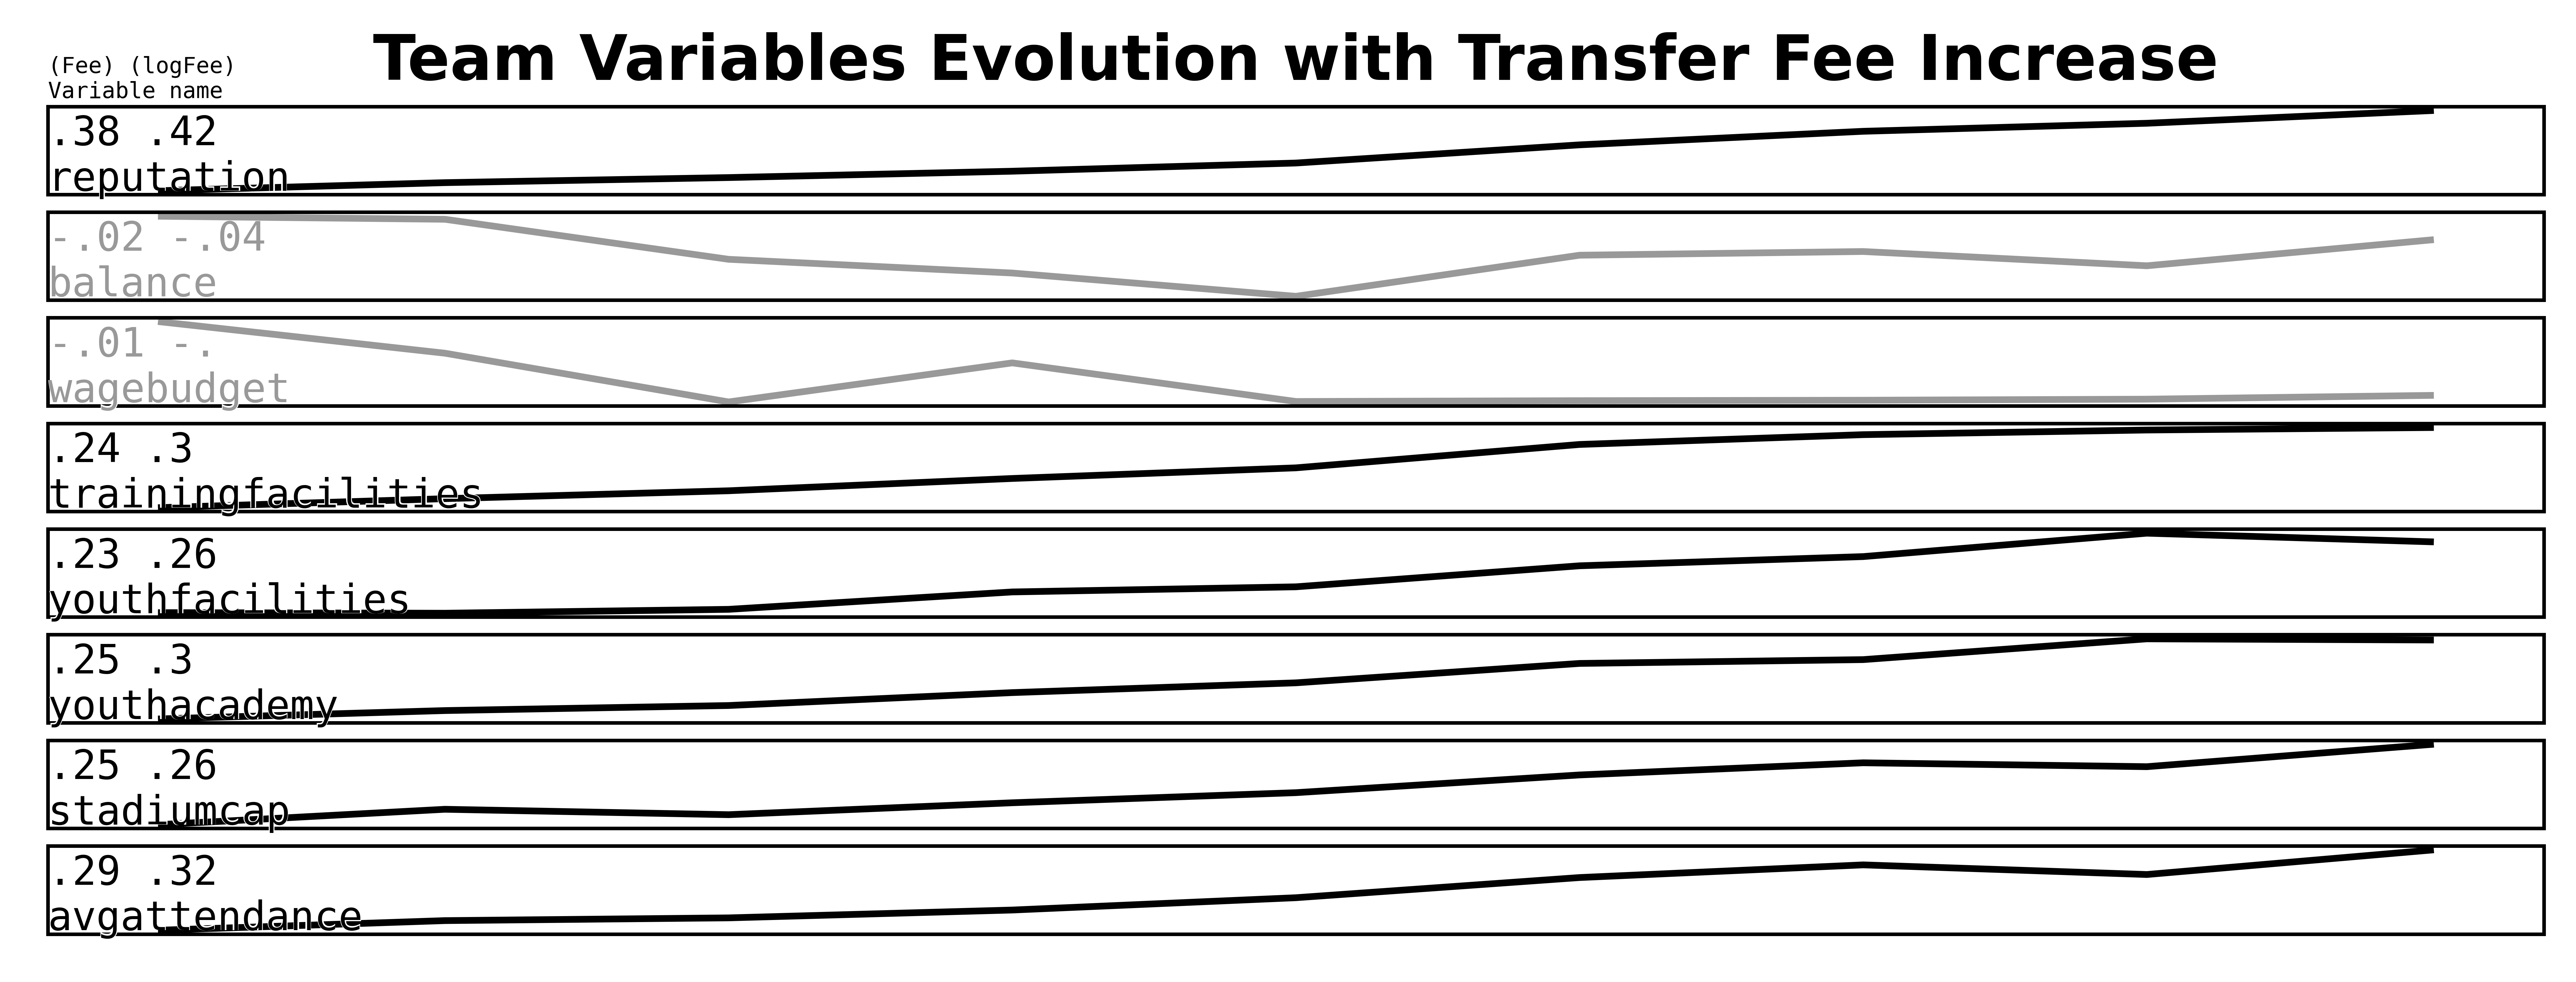

In [14]:
slots = len(team_var)
plt.rcParams['figure.figsize'] = (10,height * slots / fixed_slots)
for i, feature in enumerate(team_var):
    plt.subplot(slots, 1, i+1)
    if progression_df[feature].iloc[0] < progression_df[feature].iloc[-1]:
        plt.plot(progression_df[feature], color = 'C0')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'white', family='monospace', weight='bold')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'C0', family='monospace')
    else:
        plt.plot(progression_df[feature], color = 'C2')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'white', family='monospace', weight='bold')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'C2', family='monospace')
    plt.xticks([])
    plt.yticks([])
plt.subplot(slots, 1, 1)
plt.title('Team Variables Evolution with Transfer Fee Increase', fontsize=small_letter, fontweight='bold')
plt.text(-0.4, progression_df[team_var[0]].max() + 0.28, '(Fee) (logFee)\nVariable name', fontsize=smaller_letter, color = 'C0', family='monospace')
plt.savefig('img/006-2TeamEvo.eps', format='eps');

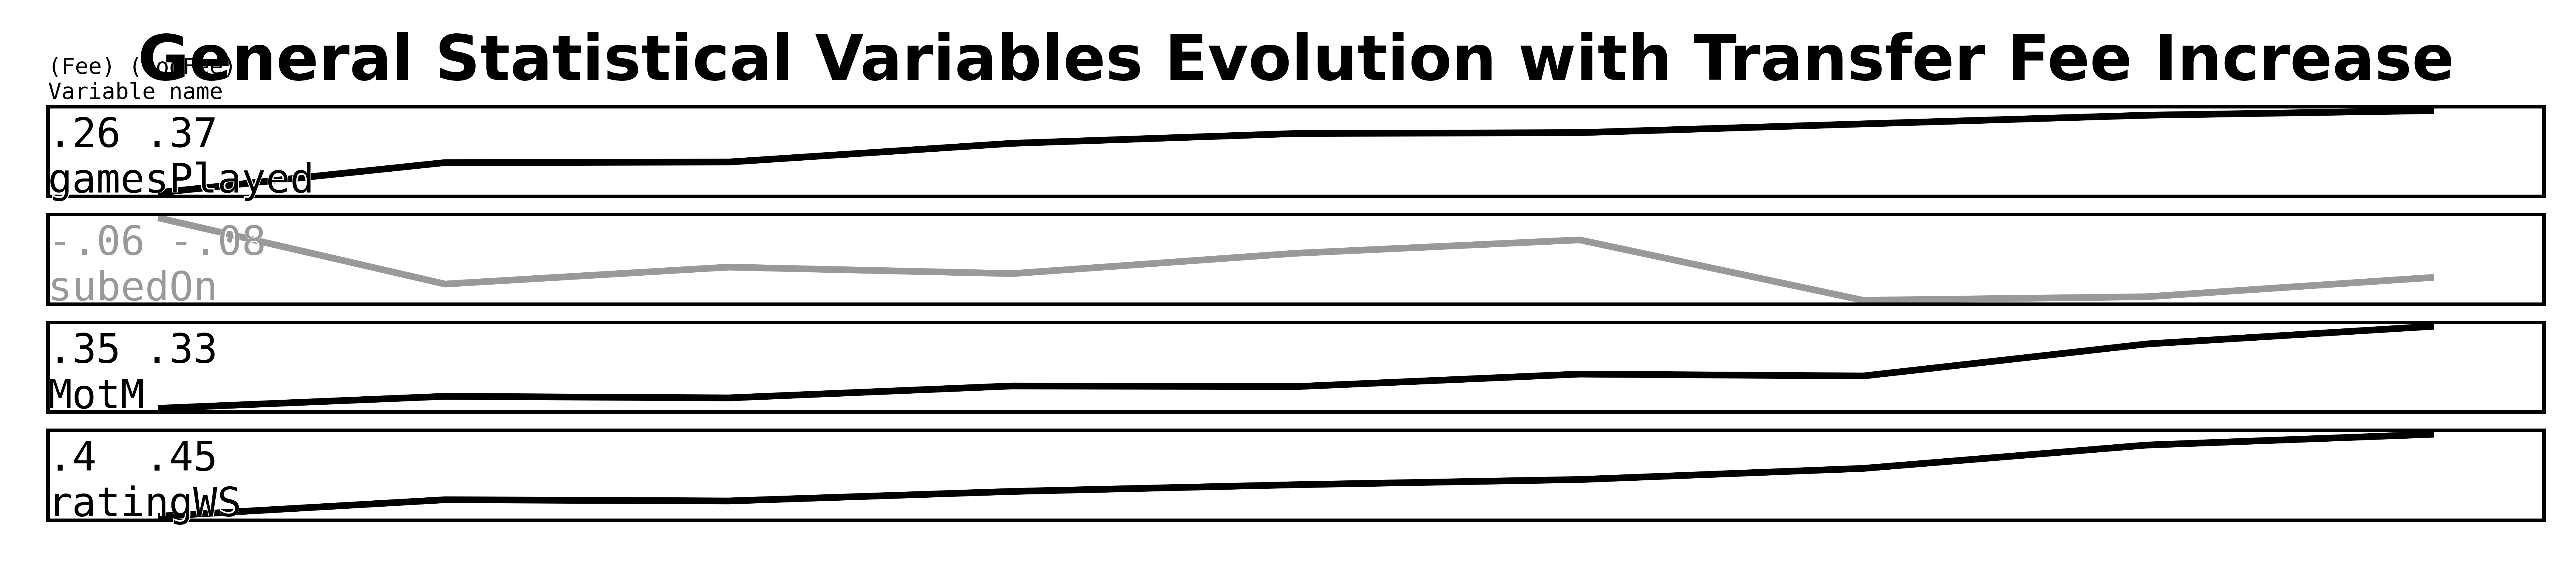

In [15]:
slots = len(stats_var)
plt.rcParams['figure.figsize'] = (10,height * slots / fixed_slots)
for i, feature in enumerate(stats_var):
    plt.subplot(slots, 1, i+1)
    if progression_df[feature].iloc[0] < progression_df[feature].iloc[-1]:
        plt.plot(progression_df[feature], color = 'C0')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'white', family='monospace', weight='bold')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'C0', family='monospace')
    else:
        plt.plot(progression_df[feature], color = 'C2')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'white', family='monospace', weight='bold')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'C2', family='monospace')
    plt.xticks([])
    plt.yticks([])
plt.subplot(slots, 1, 1)
plt.title('General Statistical Variables Evolution with Transfer Fee Increase', fontsize=small_letter, fontweight='bold')
plt.text(-0.4, progression_df[stats_var[0]].max() + 0.15, '(Fee) (logFee)\nVariable name', fontsize=smaller_letter, color = 'C0', family='monospace')
plt.savefig('img/006-3GeneralEvo.eps', format='eps');

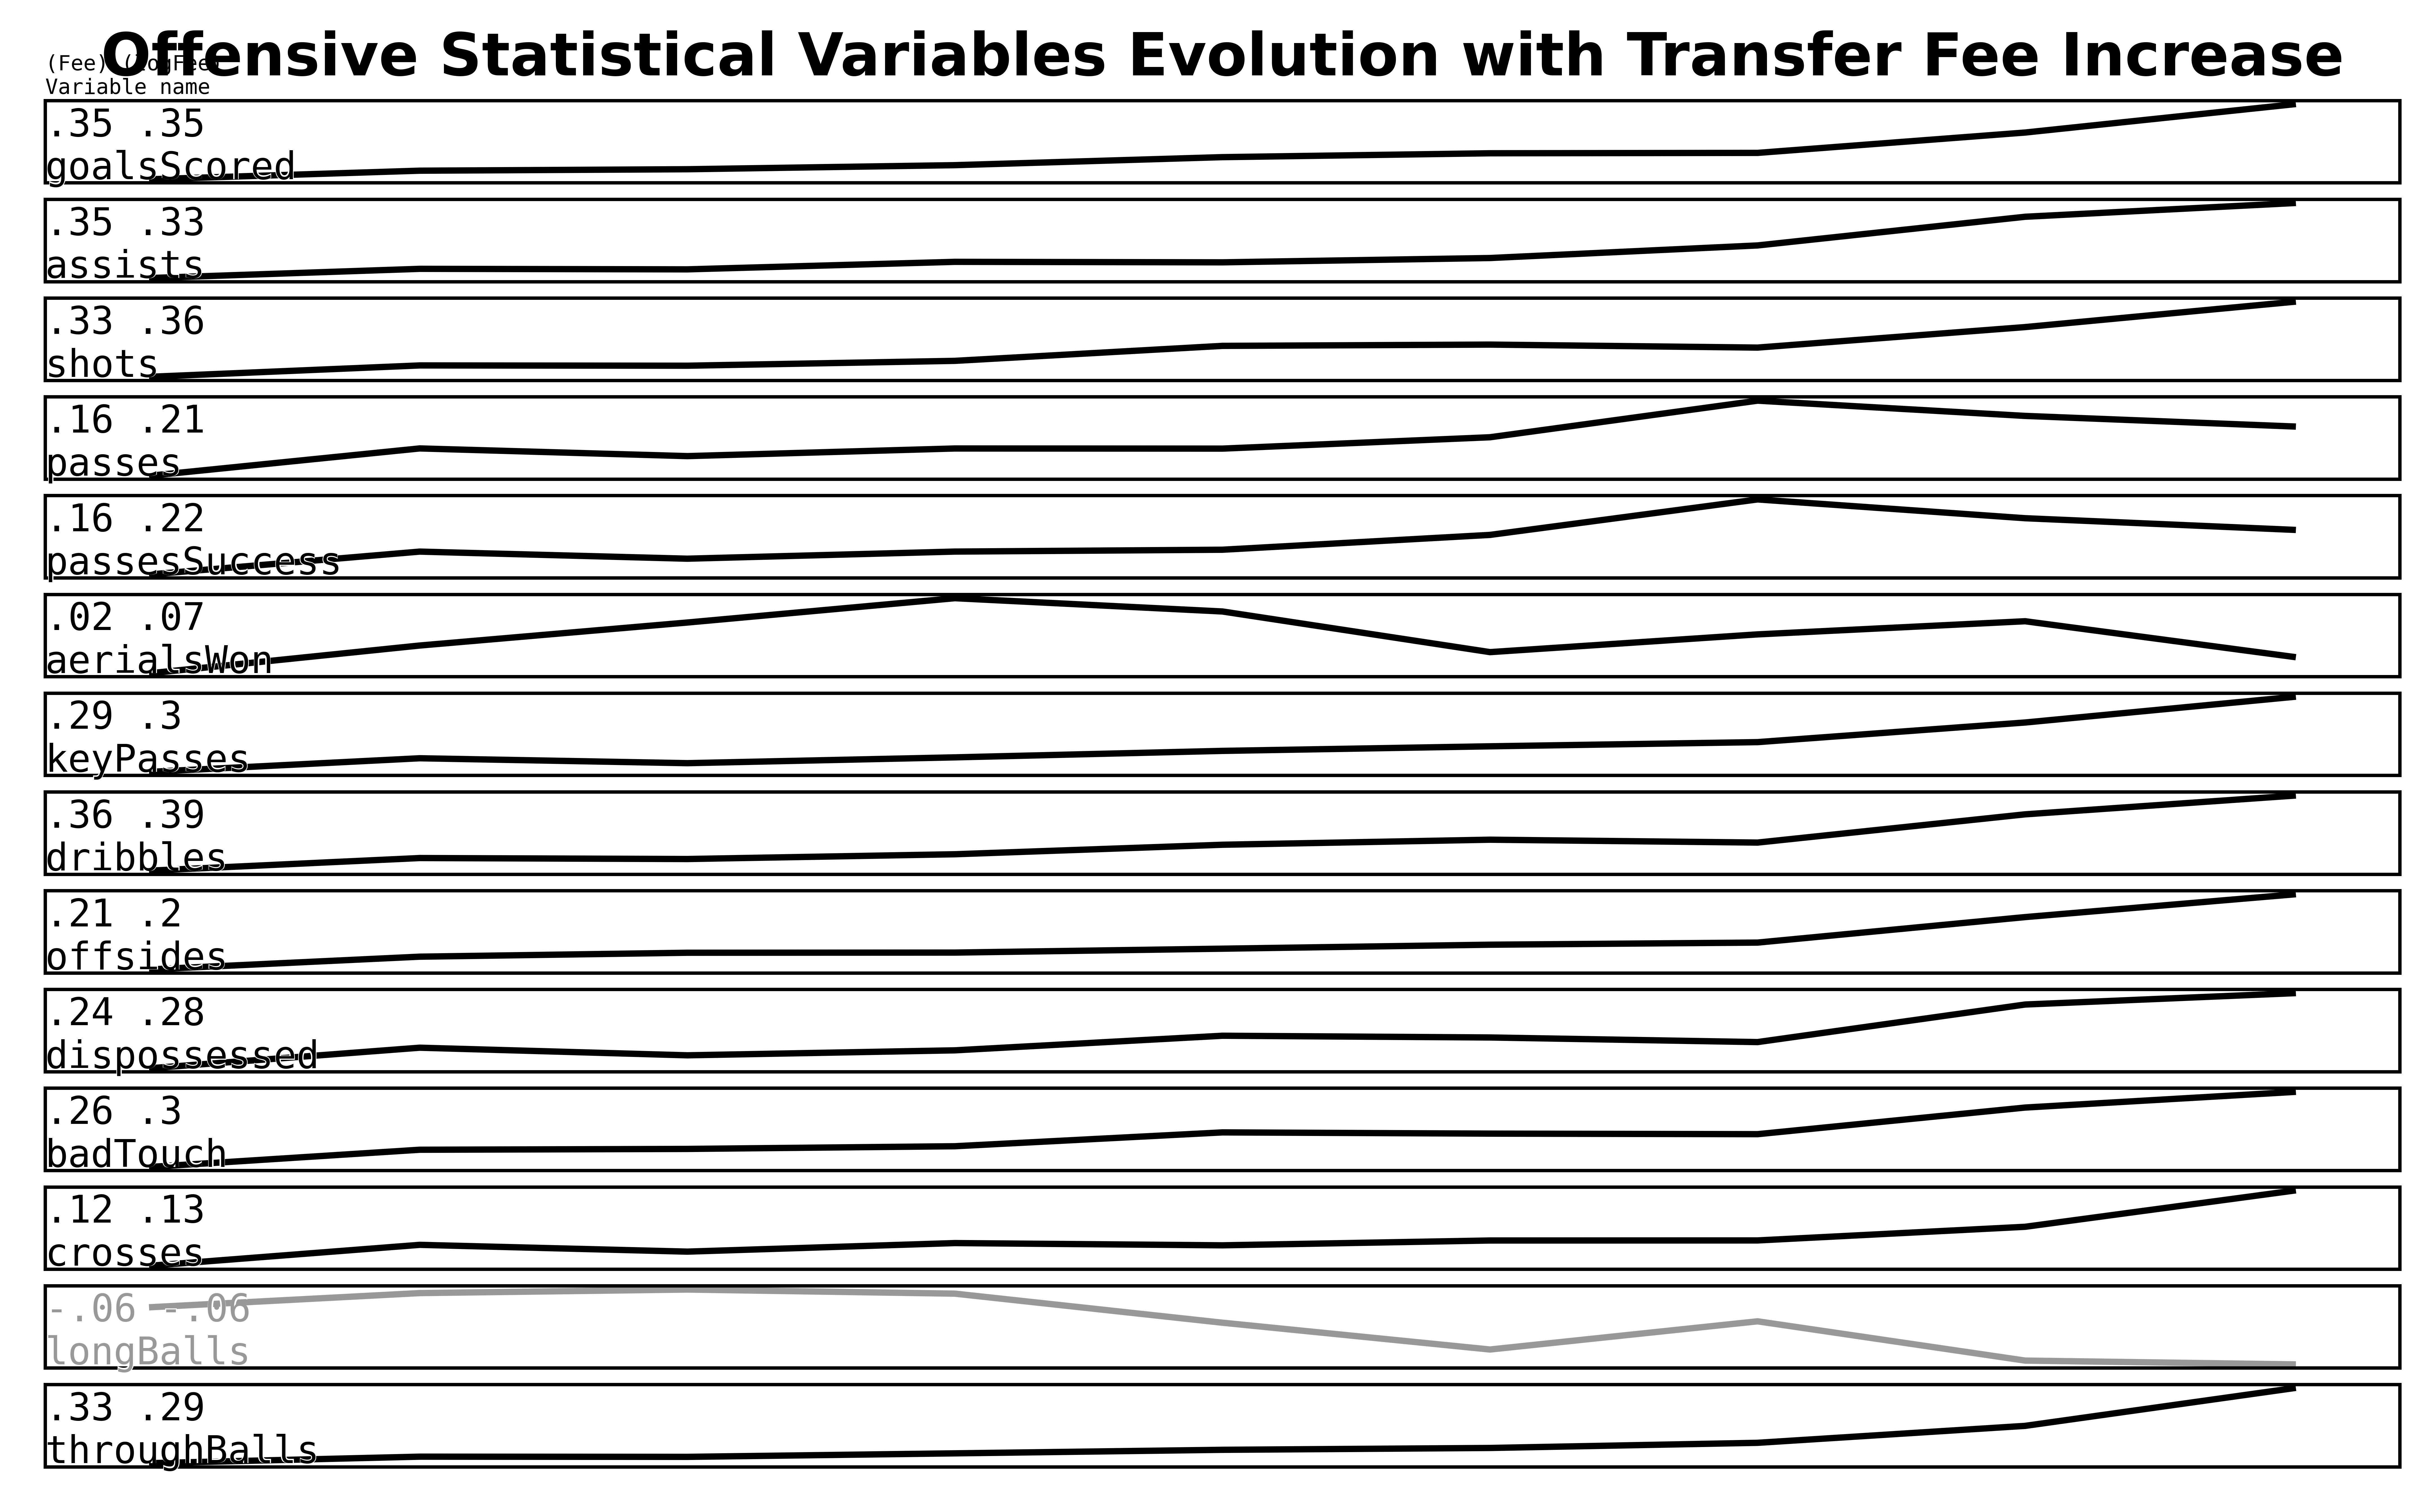

In [16]:
slots = len(offensive_var)
plt.rcParams['figure.figsize'] = (10,height * slots / fixed_slots)
for i, feature in enumerate(offensive_var):
    plt.subplot(slots, 1, i+1)
    if progression_df[feature].iloc[0] < progression_df[feature].iloc[-1]:
        plt.plot(progression_df[feature], color = 'C0')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'white', family='monospace', weight='bold')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'C0', family='monospace')
    else:
        plt.plot(progression_df[feature], color = 'C2')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'white', family='monospace', weight='bold')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'C2', family='monospace')
    plt.xticks([])
    plt.yticks([])
plt.subplot(slots, 1, 1)
plt.title('Offensive Statistical Variables Evolution with Transfer Fee Increase', fontsize=small_letter, fontweight='bold')
plt.text(-0.4, progression_df[offensive_var[0]].max() + 0.3, '(Fee) (logFee)\nVariable name', fontsize=smaller_letter, color = 'C0', family='monospace')
plt.savefig('img/006-4OffensiveEvo.eps', format='eps');

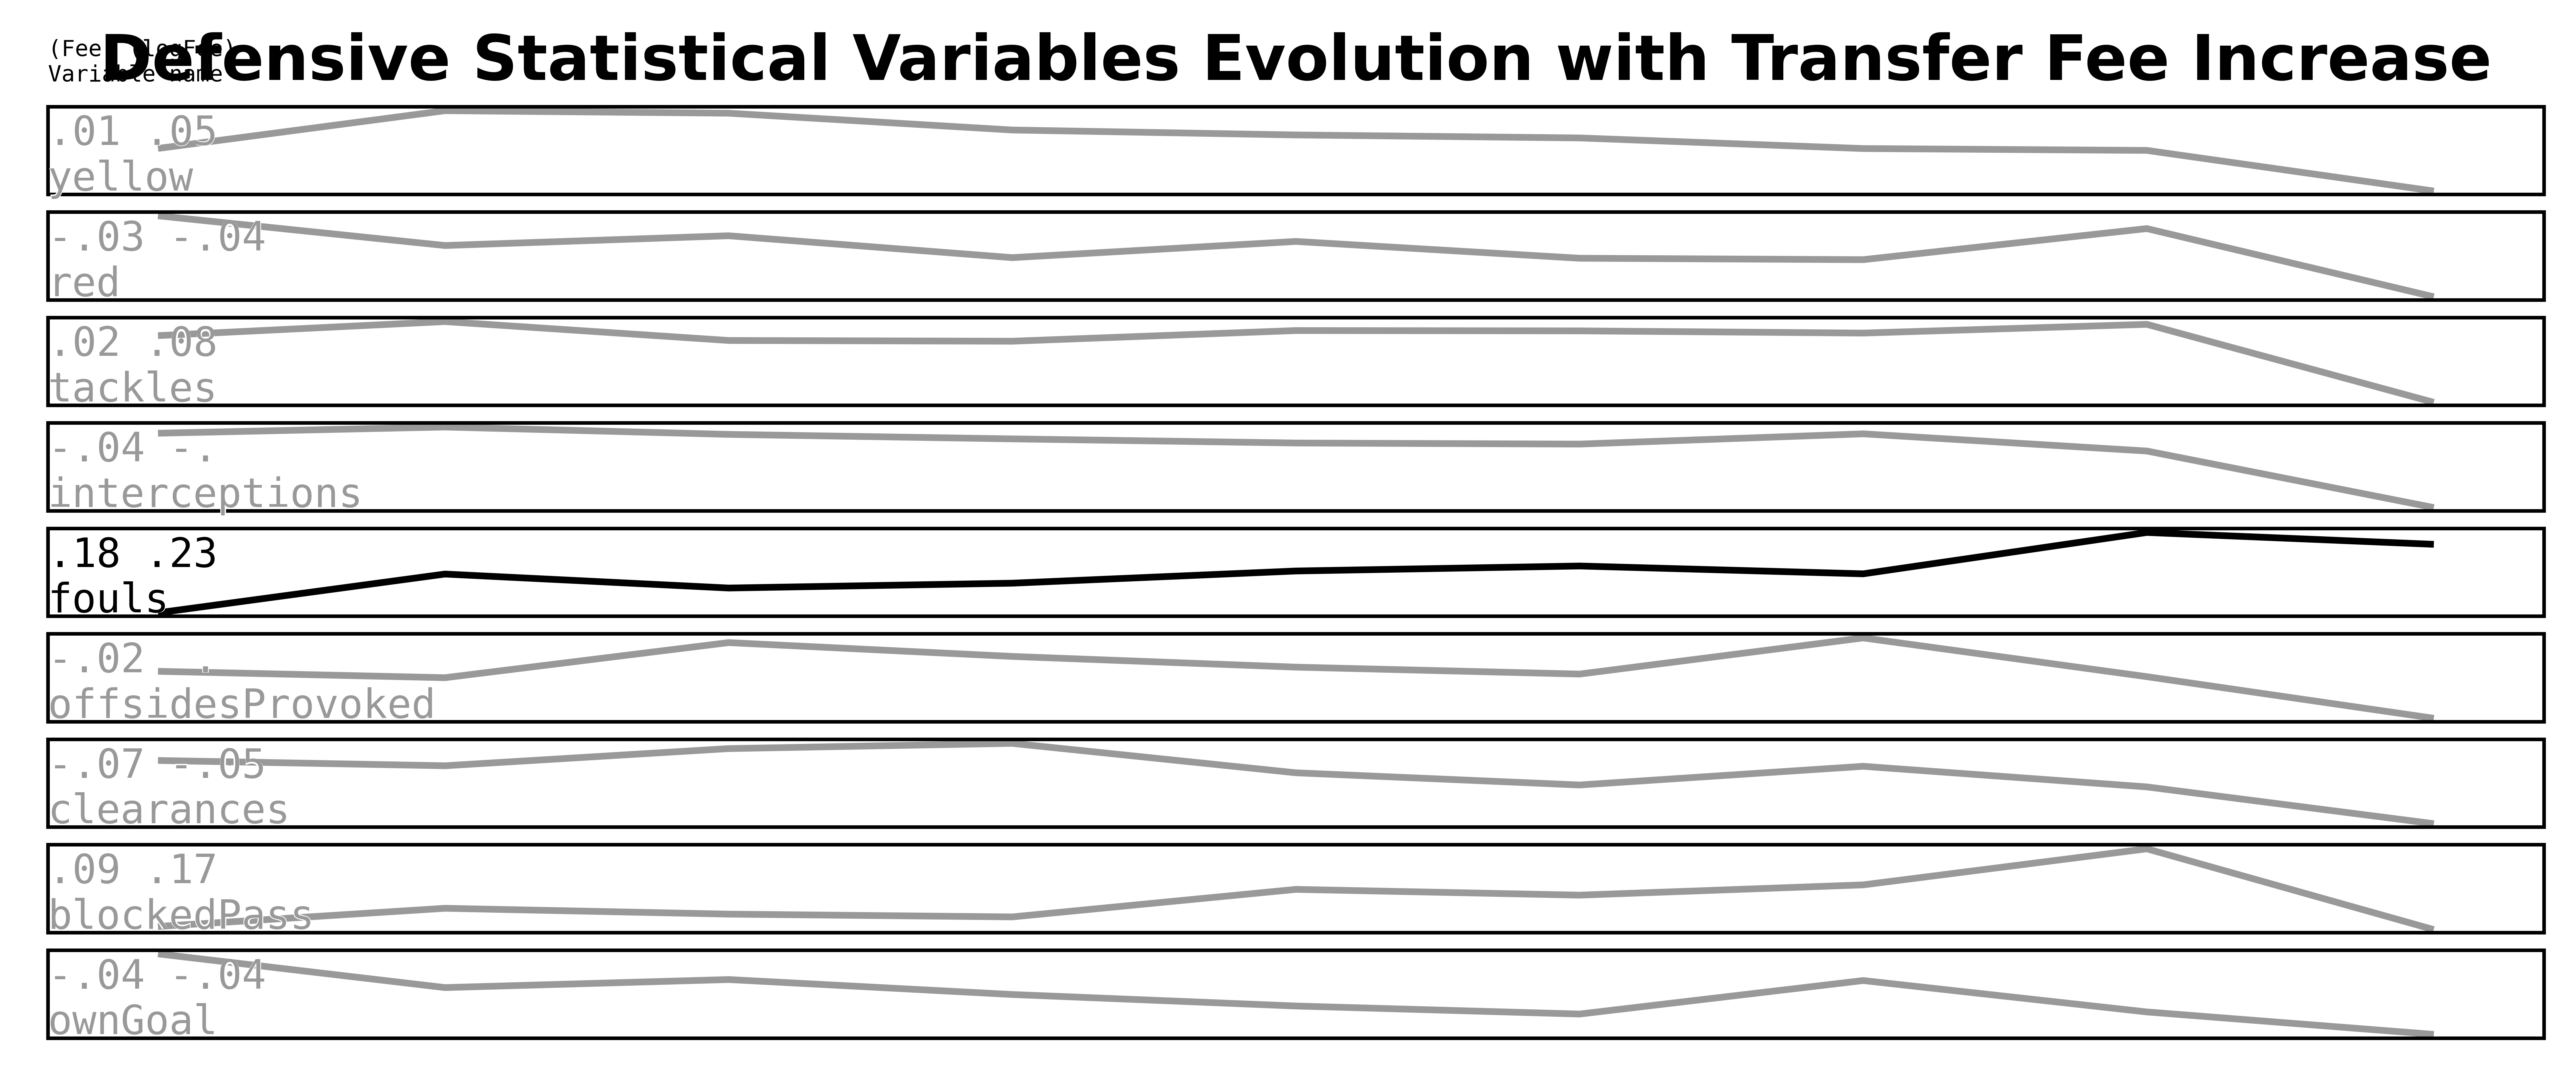

In [17]:
slots = len(defensive_var)
plt.rcParams['figure.figsize'] = (10,height * slots / fixed_slots)
for i, feature in enumerate(defensive_var):
    plt.subplot(slots, 1, i+1)
    if progression_df[feature].iloc[0] < progression_df[feature].iloc[-1]:
        plt.plot(progression_df[feature], color = 'C0')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'white', family='monospace', weight='bold')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'C0', family='monospace')
    else:
        plt.plot(progression_df[feature], color = 'C2')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'white', family='monospace', weight='bold')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'C2', family='monospace')
    plt.xticks([])
    plt.yticks([])
plt.subplot(slots, 1, 1)
plt.title('Defensive Statistical Variables Evolution with Transfer Fee Increase', fontsize=small_letter, fontweight='bold')
plt.text(-0.4, progression_df[defensive_var[0]].max() + 0.1, '(Fee) (logFee)\nVariable name', fontsize=smaller_letter, color = 'C0', family='monospace')
plt.savefig('img/006-5DefensiveEvo.eps', format='eps');

In [18]:
slots = len(previous_var)
plt.rcParams['figure.figsize'] = (10,height * slots / fixed_slots)
for i, feature in enumerate(previous_var):
    plt.subplot(slots, 1, i+1)
    if progression_df[feature].iloc[0] < progression_df[feature].iloc[-1]:
        plt.plot(progression_df[feature], color = 'C0')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'white', family='monospace', weight='bold')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'C0', family='monospace')
    else:
        plt.plot(progression_df[feature], color = 'C2')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'white', family='monospace', weight='bold')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'C2', family='monospace')
    plt.xticks([])
    plt.yticks([])
plt.subplot(slots, 1, 1)
plt.title('Previous Performance Variables Evolution with Transfer Fee Increase', fontsize=small_letter, fontweight='bold')
plt.text(-0.4, progression_df[defensive_var[0]].max() + 0.1, '(Fee) (logFee)\nVariable name', fontsize=smaller_letter, color = 'C0', family='monospace')
plt.savefig('img/006-6PreviousEvo.eps', format='eps');

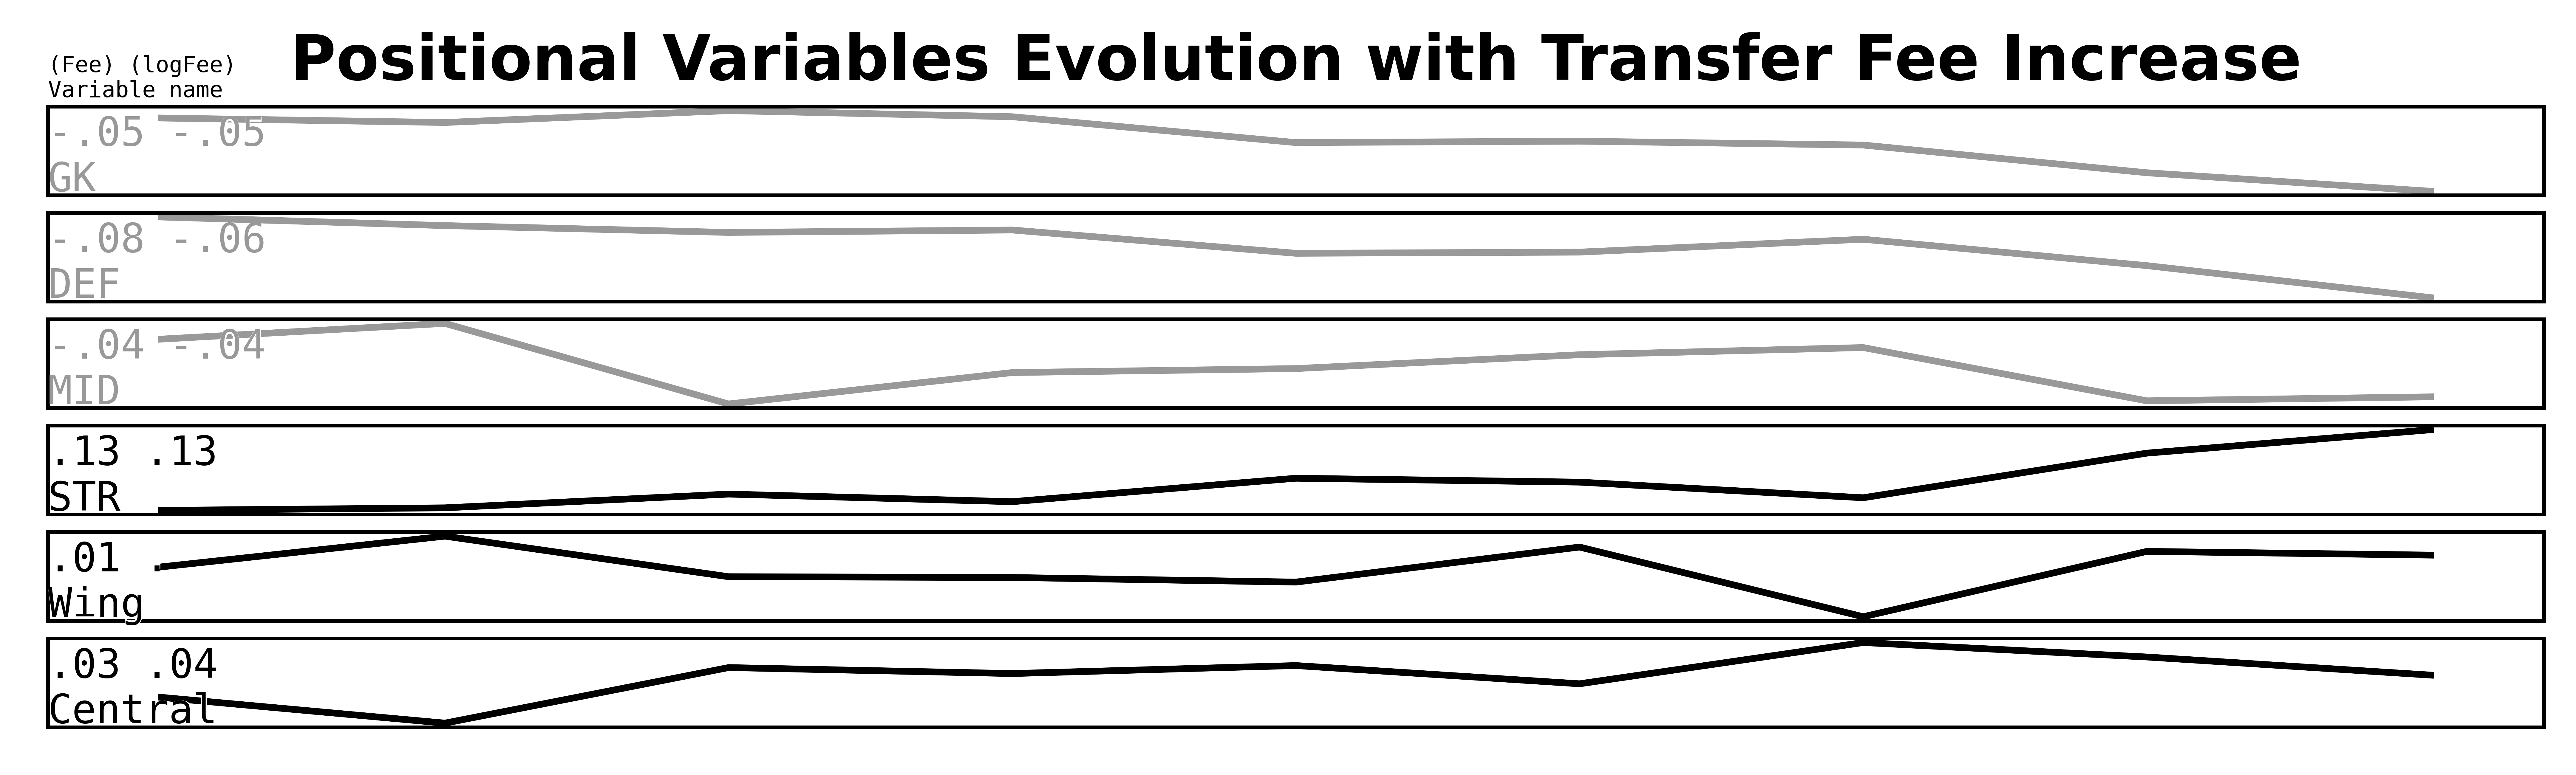

In [19]:
slots = len(pos_var)
plt.rcParams['figure.figsize'] = (10,height * slots / fixed_slots)
for i, feature in enumerate(pos_var):
    plt.subplot(slots, 1, i+1)
    if progression_df[feature].iloc[0] < progression_df[feature].iloc[-1]:
        plt.plot(progression_df[feature], color = 'C0')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'white', family='monospace', weight='bold')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'C0', family='monospace')
    else:
        plt.plot(progression_df[feature], color = 'C2')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'white', family='monospace', weight='bold')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'C2', family='monospace')
    plt.xticks([])
    plt.yticks([])
plt.subplot(slots, 1, 1)
plt.title('Positional Variables Evolution with Transfer Fee Increase', fontsize=small_letter, fontweight='bold')
plt.text(-0.4, progression_df[pos_var[0]].max() + 0.05, '(Fee) (logFee)\nVariable name', fontsize=smaller_letter, color = 'C0', family='monospace')
plt.savefig('img/006-7PositionalEvo.eps', format='eps');

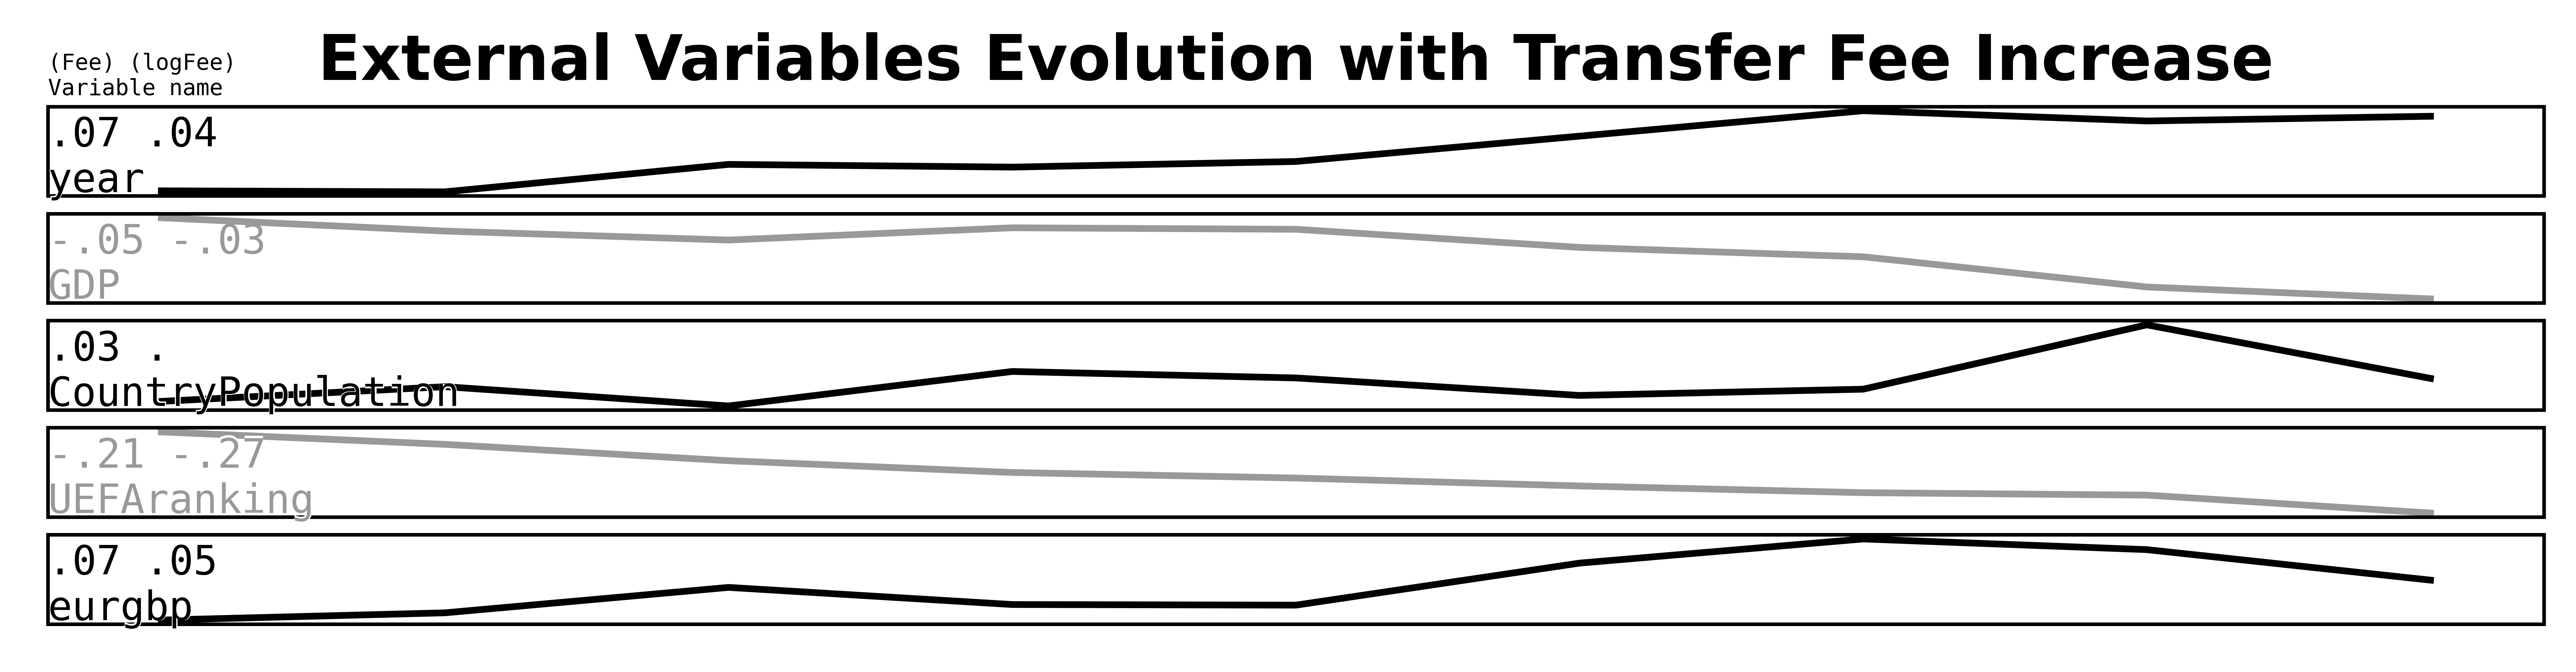

In [20]:
slots = len(external_var)
plt.rcParams['figure.figsize'] = (10,height * slots / fixed_slots)
for i, feature in enumerate(external_var):
    plt.subplot(slots, 1, i+1)
    if progression_df[feature].iloc[0] < progression_df[feature].iloc[-1]:
        plt.plot(progression_df[feature], color = 'C0')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'white', family='monospace', weight='bold')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'C0', family='monospace')
    else:
        plt.plot(progression_df[feature], color = 'C2')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'white', family='monospace', weight='bold')
        plt.text(-0.4, progression_df[feature].min(), str(corr_matrix1[['fee_cleaned', 'fee_log']].loc[feature].values.round(2)).replace('[','').replace(']','').replace('0.','.') + '\n' + feature, fontsize=normal_letter, color = 'C2', family='monospace')
    plt.xticks([])
    plt.yticks([])
plt.subplot(slots, 1, 1)
plt.title('External Variables Evolution with Transfer Fee Increase', fontsize=small_letter, fontweight='bold')
plt.text(-0.4, progression_df[external_var[0]].max() + 0.1, '(Fee) (logFee)\nVariable name', fontsize=smaller_letter, color = 'C0', family='monospace')
plt.savefig('img/006-8ExternalEvo.eps', format='eps');